## Importing the libraries

In [234]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR

## Loading the dataset

In [203]:
titanic = pd.read_csv('DataSet/Titanic.csv')

In [204]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Visualizing the dataset

<AxesSubplot:xlabel='Survived', ylabel='count'>

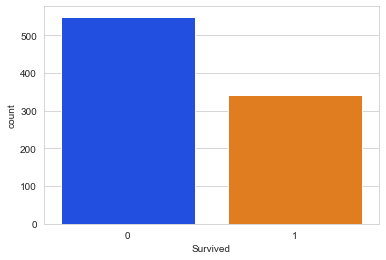

In [205]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=titanic, palette=sns.color_palette('bright'))

# More than half of the people travelled has died in the shipwreck

<AxesSubplot:xlabel='Survived', ylabel='count'>

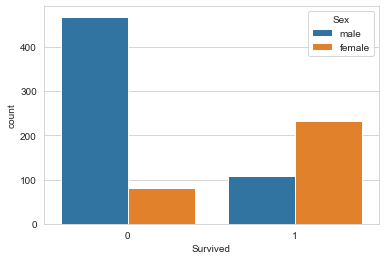

In [206]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=titanic, palette=sns.color_palette('tab10'))

# Most of the male passengers have died

<AxesSubplot:xlabel='Survived', ylabel='count'>

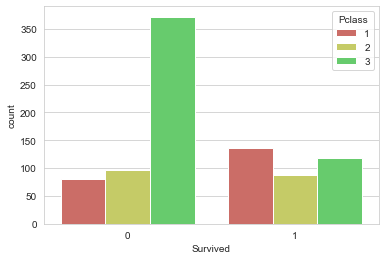

In [207]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=titanic, palette=sns.color_palette('hls'))

#Most of the third class passengers have died

<AxesSubplot:xlabel='Age', ylabel='Count'>

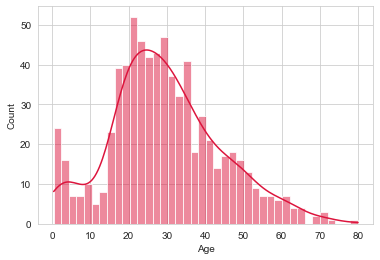

In [208]:
sns.histplot(titanic['Age'].dropna(), kde=True, color='crimson', bins=40)

# The average age is around 20-40

<AxesSubplot:xlabel='SibSp', ylabel='count'>

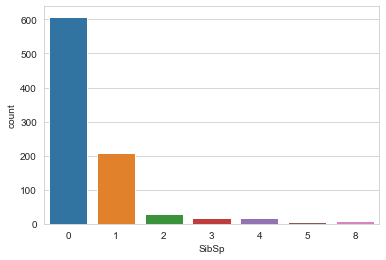

In [209]:
sns.countplot(x='SibSp', data=titanic)

# Most of the people didnt have any Siblings or spouse

## Cleaning the Data

In [210]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

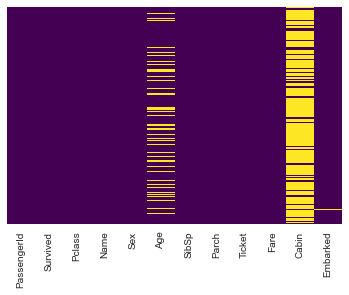

In [211]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

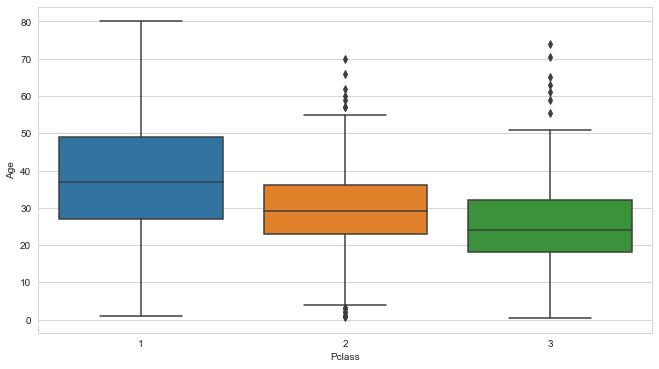

In [212]:
plt.figure(figsize=(11, 6))
sns.boxplot(x='Pclass', y='Age', data=titanic, palette='tab10')

In [213]:
# Finding the mean value of Age
ageMean = round(titanic['Age'].mean())
print(f"Average age of the passengers = {ageMean}")

Average age of the passengers = 30


In [214]:
titanic['Age'].fillna(value=ageMean, inplace=True)

<AxesSubplot:>

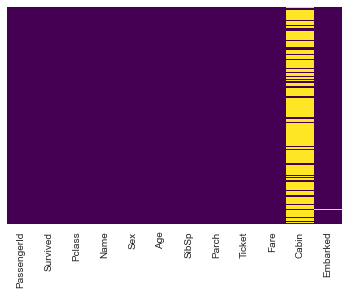

In [215]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [216]:
titanic.drop('Cabin', axis=1, inplace=True)

<AxesSubplot:>

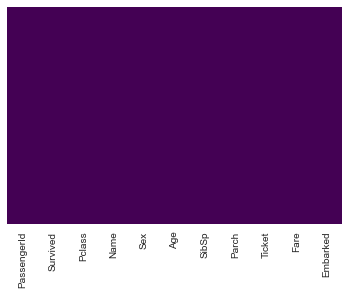

In [217]:
titanic.dropna(inplace=True)
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [218]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Transforming categorical data into numerical data

In [219]:
sex = pd.get_dummies(titanic['Sex'], drop_first=True)
embark = pd.get_dummies(titanic['Embarked'], drop_first=True)

In [220]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [221]:
titanic.drop(['PassengerId', 'Embarked', 'Sex', 'Name', 'Ticket'], axis=1, inplace=True)

In [222]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [223]:
titanic = pd.concat([titanic, sex, embark], axis=1)
titanic.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## Train and Test split

In [224]:
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

In [266]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

## Training the model

In [267]:
svr_model = SVR(kernel = 'rbf' )
svr_model.fit(X_train, y_train)

SVR()

## Evaluating the model

In [271]:
predictions = svr_model.predict(X_test)

In [272]:
print(f"Mean Squared Error = {mean_squared_error(y_test, predictions)}")

Mean Squared Error = 0.1883318748839575


In [273]:
print(f"Mean Absolute Error = {mean_absolute_error(y_test, predictions)}")

Mean Absolute Error = 0.3139991450330255


## Accuracy

In [274]:
print(f"Accuracy of the Model = {(1 - mean_squared_error(y_test, predictions)) * 100}")

Accuracy of the Model = 81.16681251160425
